In [8]:
#Subir el archivo a google colab

#Importamos la función para subir archivos desde el equipo local a google colab
from google.colab import files
#Genera un cuadro de acción para interacuar y poder selecionar el archivo .csv a nuestro entorno
uploaded = files.upload()

Saving creditcard.csv to creditcard (1).csv


In [9]:
import pandas as pd

# Cargar el CSV al DataFrame de Pandas para la manipulación de los datos tabulares
df = pd.read_csv("creditcard.csv")

# Resuelve las primeras filas del DataFrame para obtener una vista previa de los datos cargados.
df.head()


Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28  Amount  Class  
0 -0.189115  0.133558 -0.021053  149.62      0  
1  0.125895 -0.008983  0.014724    2.69      0  
2 -0.139097 -0.055353 -0.059752  378.66      0  
3 -0.221929  0.062723  0.061458  123.50      0  
4  0.502292  0.219422  0.215153   69.99      0  

[5 rows x 31 columns]

In [10]:
#Realizamos la inspección general del .csv

# Muestra la información general del DataFrame
df.info()

# Genera un resumen estadístico con medidas
df.describe()

# Cuenta cuantos valores nulos hay en cada columna para detectar datos faltantes
df.isnull().sum()

# Valida la cantidad de ocurrencias de cada clase
df['Class'].value_counts()

# Muestra el porcentaje que representa cada clase en respecto al total de registros
df['Class'].value_counts(normalize=True) * 100


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

Class
0    99.827251
1     0.172749
Name: proportion, dtype: float64

/tmp/ipython-input-1884039640.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Class', data=df, palette='viridis')


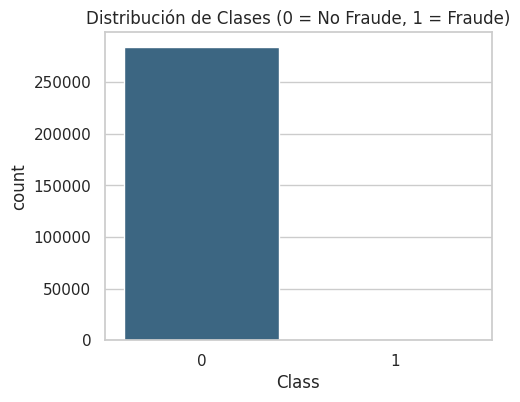

In [11]:
#Distribución de clases

import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# Creación de un grafico de barras que muestra la distribución de las clases dentro del DATA
plt.figure(figsize=(5,4))
sns.countplot(x='Class', data=df, palette='viridis')
plt.title("Distribución de Clases (0 = No Fraude, 1 = Fraude)")
plt.show()

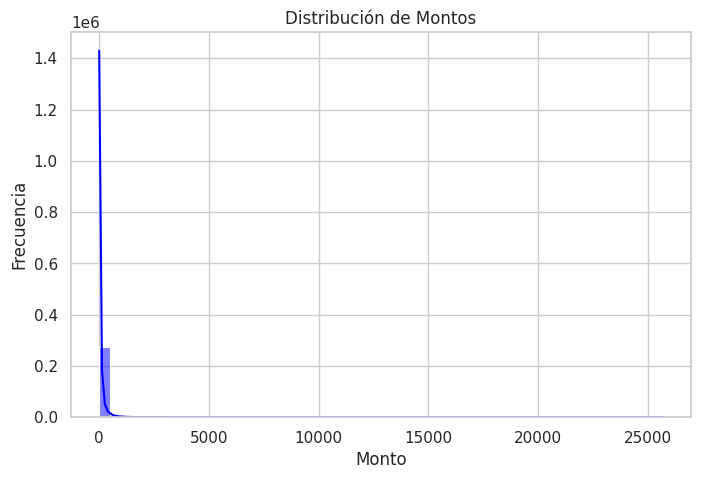

In [12]:
#Distribución de montos

# Genera un histograma con curva de densidad para visualizar cómo se distribuyen los montos en el DATA
plt.figure(figsize=(8,5))
sns.histplot(df['Amount'], bins=50, kde=True, color='blue')
plt.title("Distribución de Montos")
plt.xlabel("Monto")
plt.ylabel("Frecuencia")
plt.show()

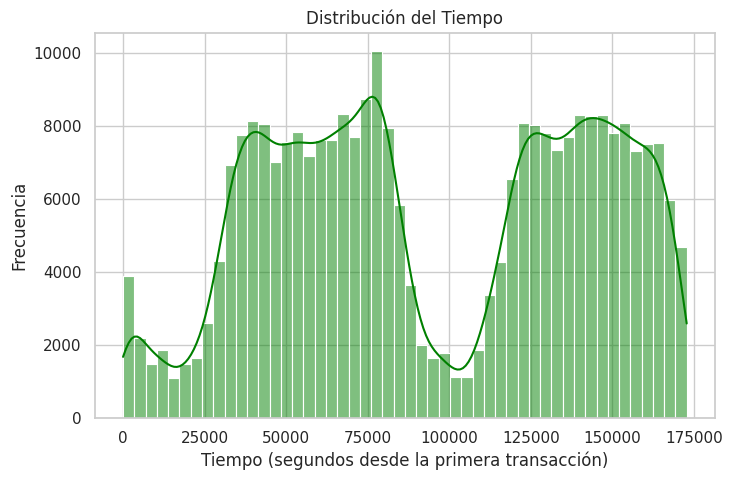

In [13]:
#Distriución del tiempo

# Muestra un histograma con curva de densidad para analizar la distribución de la variable 'Time' en el DATA
plt.figure(figsize=(8,5))
sns.histplot(df['Time'], bins=50, kde=True, color='green')
plt.title("Distribución del Tiempo")
plt.xlabel("Tiempo (segundos desde la primera transacción)")
plt.ylabel("Frecuencia")
plt.show()

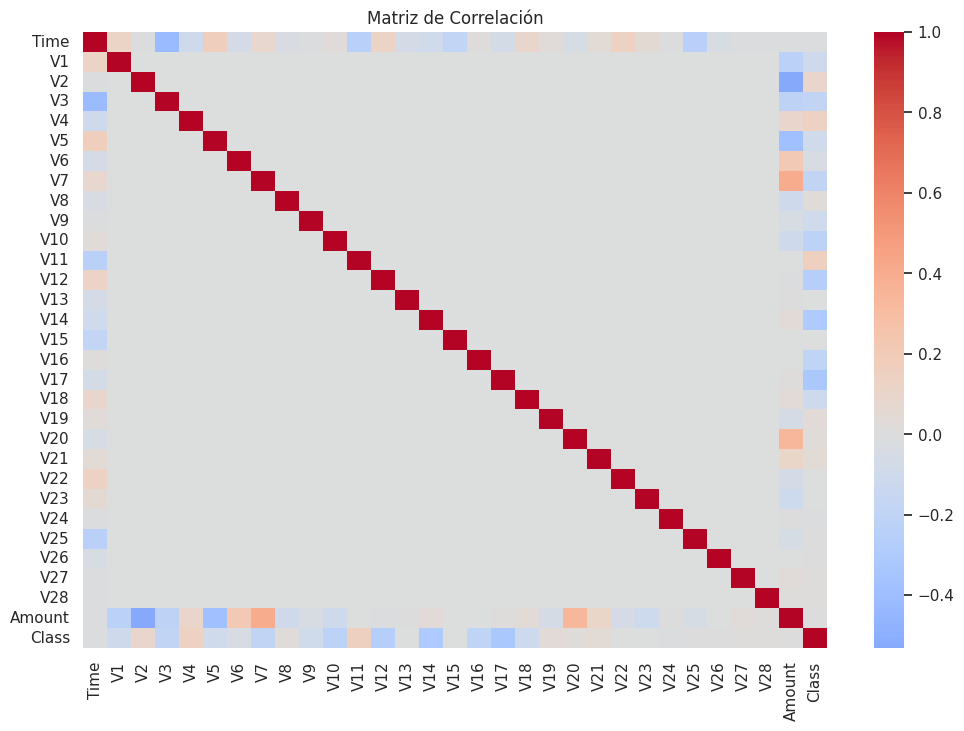

In [14]:
#Matriz de correlación

# Calcula y visualiza la matriz de correlación entre las variables del dataset para identificar relaciones entre ellas
corr = df.corr()

plt.figure(figsize=(12,8))
sns.heatmap(corr, cmap='coolwarm', center=0)
plt.title("Matriz de Correlación")
plt.show()

In [15]:
##### Uso de Ploty

# Genera un gráfico de dispersión que muestra cómo se distribuyen los montos y tiempos, diferenciando por clase (fraude o no)
import plotly.express as px

# Toma una muestra aleatoria de 5000 registros para hacer la visualización más rápida
df_sample = df.sample(5000, random_state=42)

fig = px.scatter(
    df_sample,
    x="Time",
    y="Amount",
    color="Class",
    title="Distribución de Tiempo vs Monto por Clase",
    labels={"Time": "Tiempo (segundos desde primera transacción)", "Amount": "Monto"},
    opacity=0.6
)
fig.show()

In [16]:
# Crea un histograma interactivo que muestra la distribución de montos separada por clase (fraude o no), superponiendo las barras para comparación
fig = px.histogram(
    df,
    x="Amount",
    color="Class",
    nbins=50,
    title="Distribución de Montos por Clase",
    labels={"Amount": "Monto", "Class": "Clase (0 = No Fraude, 1 = Fraude)"},
    barmode="overlay",
    opacity=0.6
)
fig.show()

In [17]:
# Genera un diagrama de caja interactivo para comparar la distribución de montos entre las clases, mostrando también todos los puntos individuales

fig = px.box(
    df,
    x="Class",
    y="Amount",
    color="Class",
    title="Boxplot de Montos por Clase",
    labels={"Class": "Clase (0 = No Fraude, 1 = Fraude)", "Amount": "Monto"},
    points="all"  # Muestra todos los puntos además de la caja
)
fig.show()

In [18]:
import numpy as np

# Calcula la correlación de todas las variables con la variable objetivo 'Class' y las ordena de mayor a menor
correlation_with_class = df.corr()['Class'].drop('Class').sort_values(ascending=False)

# Prepara estos datos en un DataFrame para facilitar la visualización con Plotly
corr_df = pd.DataFrame({
    'Variable': correlation_with_class.index,
    'Correlación': correlation_with_class.values
})

# Crea un mapa de calor interactivo que muestra cómo cada variable se relaciona con la clase (fraude o no), usando una escala de colores
fig = px.imshow(
    np.array([correlation_with_class.values]),
    labels=dict(x="Variable", y="", color="Correlación con Clase"),
    x=correlation_with_class.index,
    y=["Class"],
    color_continuous_scale="RdBu",
    zmin=-1, zmax=1
)
fig.update_xaxes(side="top")
fig.update_layout(title="Correlación de Variables con la Clase (Fraude)")
fig.show()

/tmp/ipython-input-572792940.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




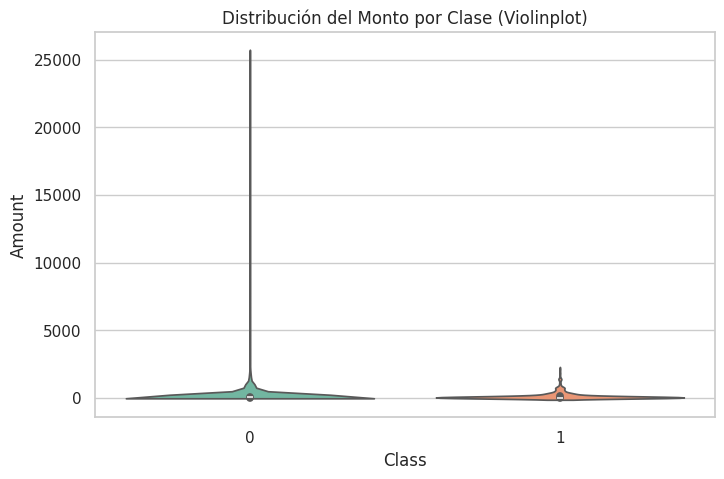

In [19]:
### Uso de seaborn
import seaborn as sns
import matplotlib.pyplot as plt

# Usa un violinplot para visualizar la distribución de los montos en cada clase, mostrando forma, densidad y rangos de los datos
plt.figure(figsize=(8,5))
sns.violinplot(x='Class', y='Amount', data=df, palette='Set2')
plt.title("Distribución del Monto por Clase (Violinplot)")
plt.show()

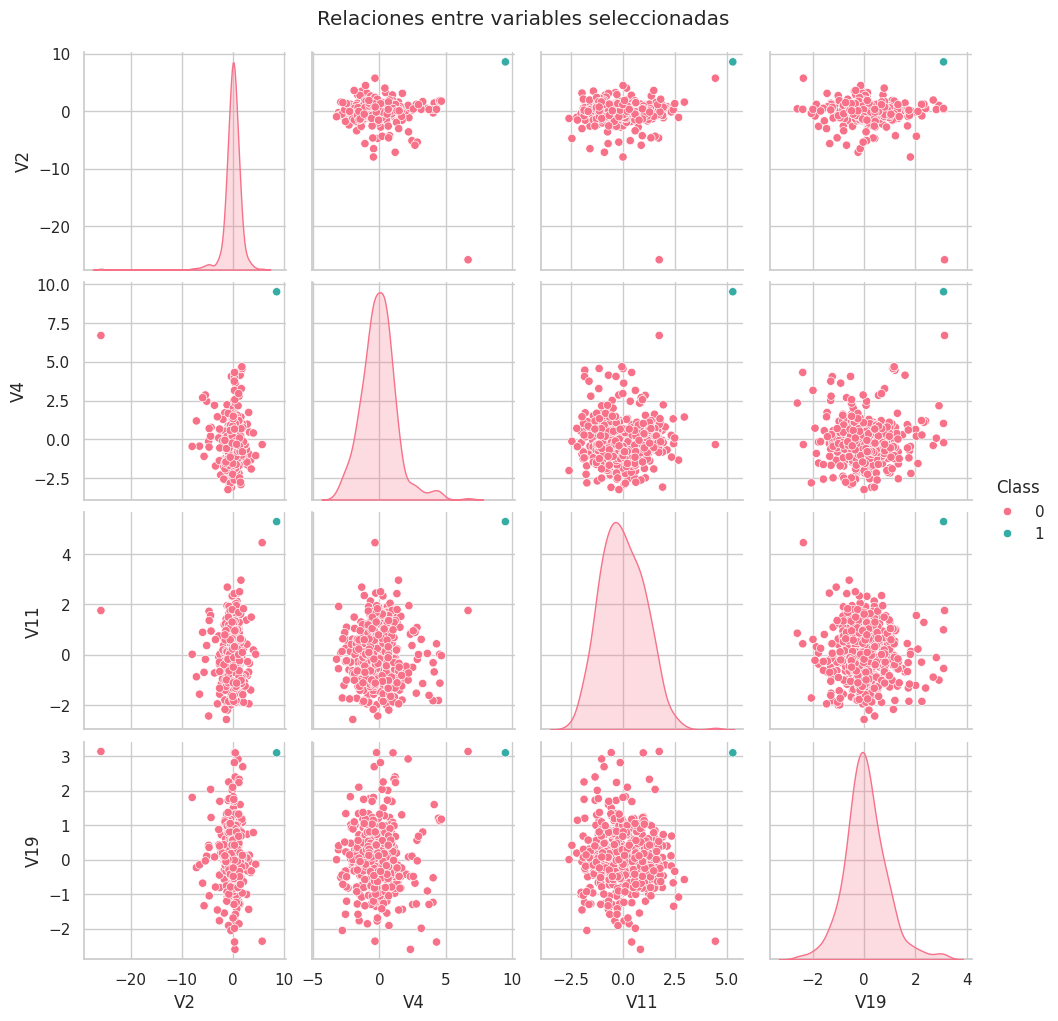

In [20]:

# Toma una muestra pequeña del dataset para facilitar la visualización y crea un pairplot
# que muestra las relaciones entre variables seleccionadas, diferenciando por clase
df_sample = df.sample(500, random_state=42)
sns.pairplot(df_sample[['V2', 'V4', 'V11', 'V19', 'Class']], hue='Class', palette='husl')
plt.suptitle("Relaciones entre variables seleccionadas", y=1.02)
plt.show()

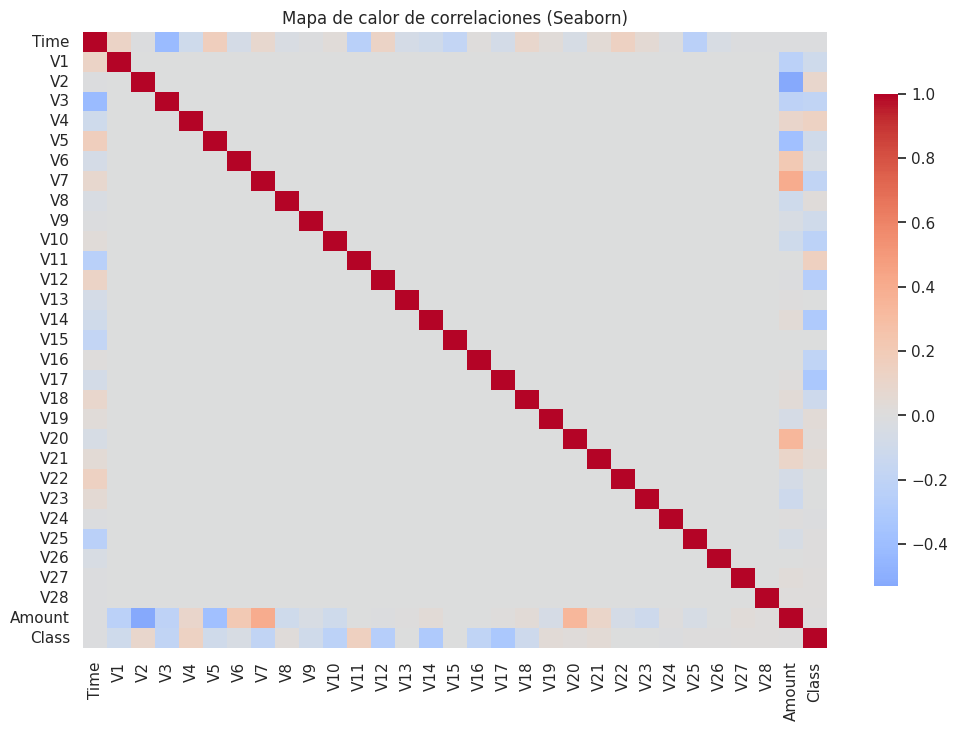

In [21]:
# Calcula y visualiza la matriz de correlación con un mapa de calor para identificar relaciones entre variables, usando Seaborn
corr = df.corr()

plt.figure(figsize=(12,8))
sns.heatmap(corr, cmap='coolwarm', center=0, annot=False, cbar_kws={'shrink':0.8})
plt.title("Mapa de calor de correlaciones (Seaborn)")
plt.show()

In [22]:

# Preparación, entrenamiento y evaluación de un modelo de regresión logística para detectar fraude

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

# Define variables predictoras (todas menos 'Class') y variable objetivo ('Class')
X = df.drop('Class', axis=1)
y = df['Class']

# Escala las columnas 'Amount' y 'Time' porque las demás ya están transformadas mediante PCA
scaler = StandardScaler()
X[['Amount', 'Time']] = scaler.fit_transform(X[['Amount', 'Time']])

# Divide el dataset en entrenamiento y prueba manteniendo la proporción de clases
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)

# Modelo
# Entrena un modelo de regresión logística con un número máximo de iteraciones definido
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predicciones
# Realiza predicciones y calcula las probabilidades para la clase positiva
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:,1]

# Métricas
# Imprime un reporte con métricas de clasificación, el área bajo la curva ROC y la matriz de confusión
print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_proba))
print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.86      0.61      0.72       148

    accuracy                           1.00     85443
   macro avg       0.93      0.81      0.86     85443
weighted avg       1.00      1.00      1.00     85443

ROC-AUC: 0.9559805159517921
Matriz de Confusión:
 [[85280    15]
 [   57    91]]
